# Analyzing Deep, Shallow and Wide CNNs on MNIST

In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

from DeeperModel import DeeperModel
from ShallowModel import ShallowModel
from WiderModel import WiderModel
import utils

## Data Visualization

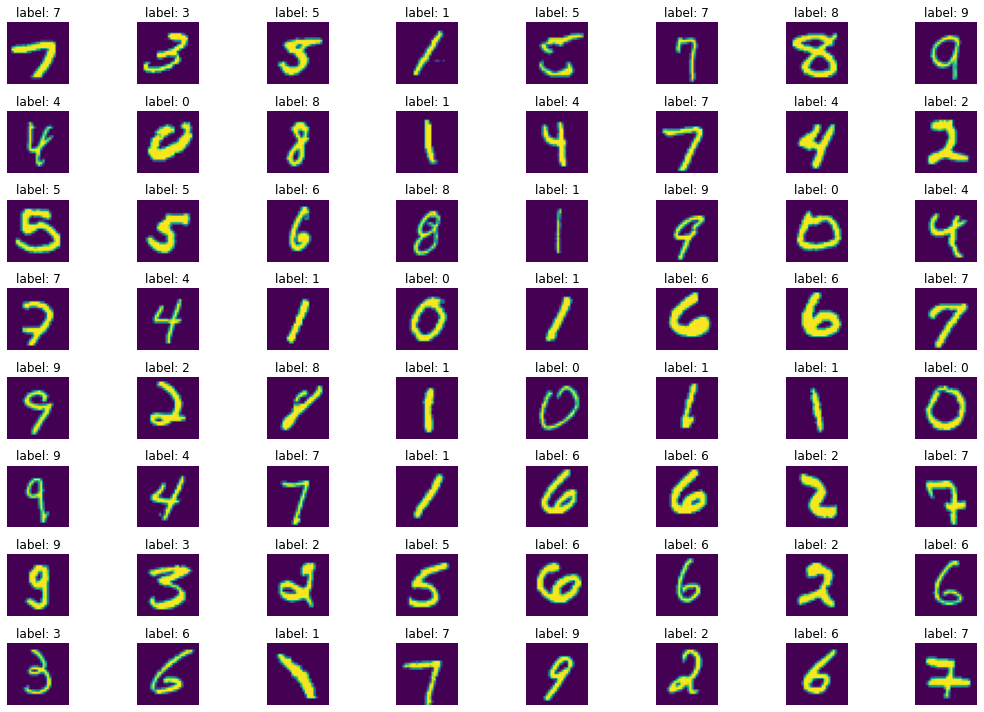

In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

# visualize
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=1, shuffle=True)
max_rows, max_cols = 8, 8
fig, axs = plt.subplots(max_rows, max_cols, figsize=(15,10))
axs = np.array(axs).flatten()
for idx, (img,label) in enumerate(train_loader):
    #print("img.shape: {} label: {}".format(img.shape, label))
    axs[idx].imshow(img[0].moveaxis(0,2))
    axs[idx].set_axis_off()
    axs[idx].set_title("label: {}".format(label.item()))
    if idx == max_rows*max_cols-1:
        break
fig.tight_layout()

In [3]:
def main():
    ## Get data
    mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))
    mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Device is : {device}")
    
    ## Training Parameters
    nepochs = 10
    batch_size = 64

    ## Create Dataloaders
    train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size)

    ### Create Model
    model1 = ShallowModel().to(device=device)
    model2 = WiderModel().to(device=device)
    model3 = DeeperModel(batchNorm=False).to(device=device)
    model4 = DeeperModel(batchNorm=True).to(device=device)
    
    loss_function = torch.nn.CrossEntropyLoss()

    #### Train #### 
    
    models = [model1, model2, model3, model4]
    models_losses = np.array([])
    models_accuracies = np.array([])
    
    for model in models:
        
        ### Define Optimizer
        optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
        
        print(model.name)
    
        training_loss_hist = []
        training_acc_hist = []

        for epoch in range(nepochs):

            train_loss, train_acc = utils.train_one_epoch(model, 
                                                    train_loader, 
                                                    optimizer, 
                                                    loss_function,
                                                    device,
                                                    debug=False)
            training_loss_hist.append(train_loss)
            training_acc_hist.append(train_acc)

            print("Epoch {} Average Train Loss: {:.4f} Average Train Acc: {:.4f}".format(epoch, round(train_loss,5), round(train_acc,5)))
        
        models_losses = np.hstack((models_losses, training_loss_hist))
        models_accuracies = np.hstack((models_accuracies, training_acc_hist))
        
        ### Save Model for sharing
        torch.save(model.state_dict(), './' + model.savename)

        ## Test
        model_test_loss, model_test_accuracy = utils.evaluate(model, test_loader, loss_function, device)
        print("{} Test Loss: {:.4f} Test Accuracy: {:.4f}\n".format(model.name, model_test_loss, model_test_accuracy))
        
    return models_losses, models_accuracies

In [4]:
models_losses, models_accuracies = main()

Device is : cuda


/anaconda3/envs/pytorch/lib/python3.8/site-packages/torch/cuda/__init__.py:81: UserWarning: 
    Found GPU0 NVIDIA GeForce GT 750M which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


Shallow Model
Epoch 0 Average Train Loss: 0.5461 Average Train Acc: 0.8625
Epoch 1 Average Train Loss: 0.2057 Average Train Acc: 0.9414
Epoch 2 Average Train Loss: 0.1457 Average Train Acc: 0.9574
Epoch 3 Average Train Loss: 0.1137 Average Train Acc: 0.9667
Epoch 4 Average Train Loss: 0.0944 Average Train Acc: 0.9725
Epoch 5 Average Train Loss: 0.0807 Average Train Acc: 0.9772
Epoch 6 Average Train Loss: 0.0713 Average Train Acc: 0.9797
Epoch 7 Average Train Loss: 0.0644 Average Train Acc: 0.9812
Epoch 8 Average Train Loss: 0.0587 Average Train Acc: 0.9828
Epoch 9 Average Train Loss: 0.0544 Average Train Acc: 0.9838
Shallow Model Test Loss: 0.0589 Test Accuracy: 0.9809

Wider Model
Epoch 0 Average Train Loss: 0.4118 Average Train Acc: 0.8973
Epoch 1 Average Train Loss: 0.1772 Average Train Acc: 0.9506
Epoch 2 Average Train Loss: 0.1264 Average Train Acc: 0.9657
Epoch 3 Average Train Loss: 0.0980 Average Train Acc: 0.9735
Epoch 4 Average Train Loss: 0.0815 Average Train Acc: 0.9778
Epoc

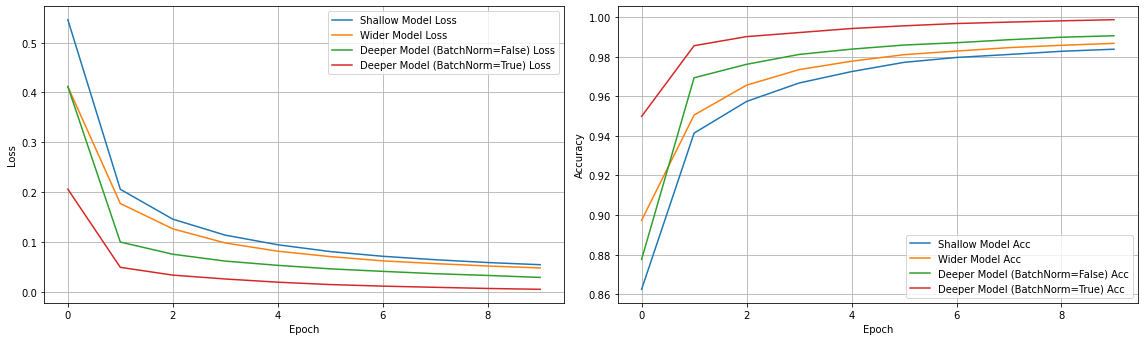

In [6]:
utils.visualize_loss_acc(models_losses, models_accuracies, title="")